In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')
display(titanic_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Generating plots for column: PassengerId


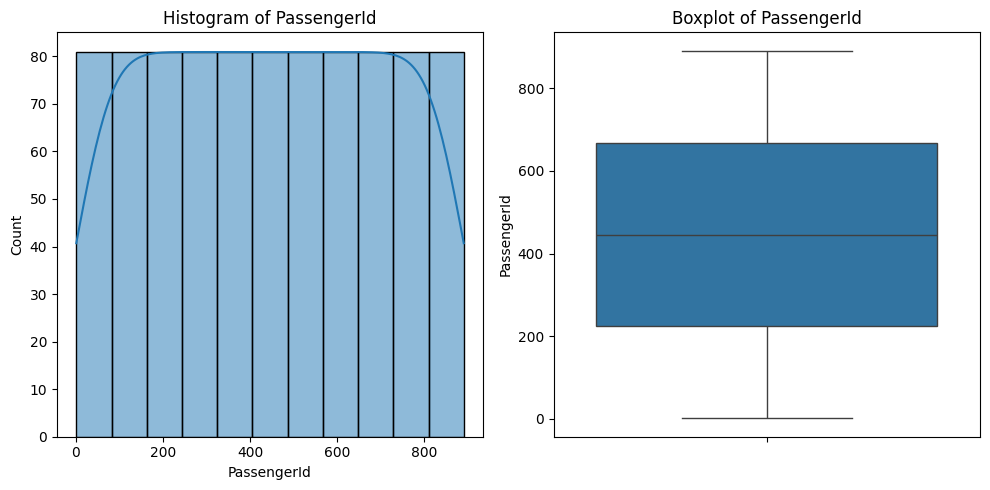

Generating plots for column: Survived


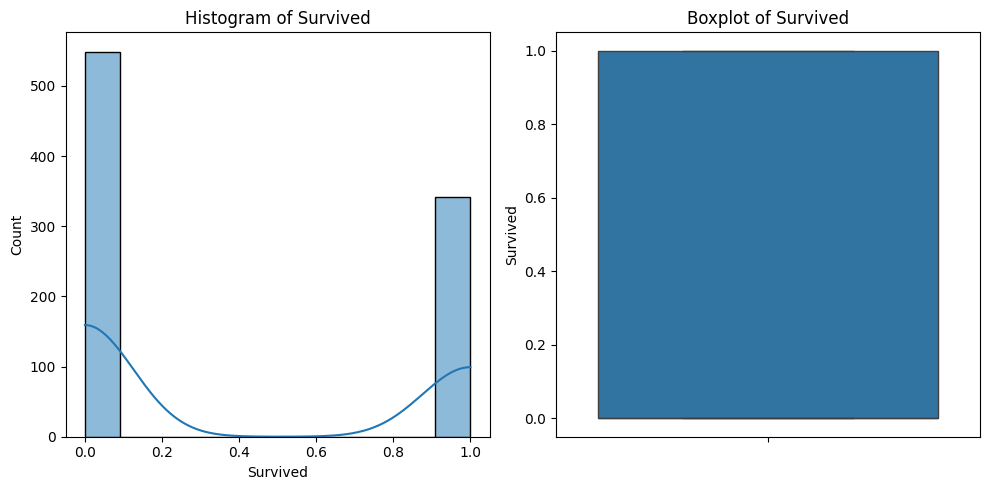

Generating plots for column: Pclass


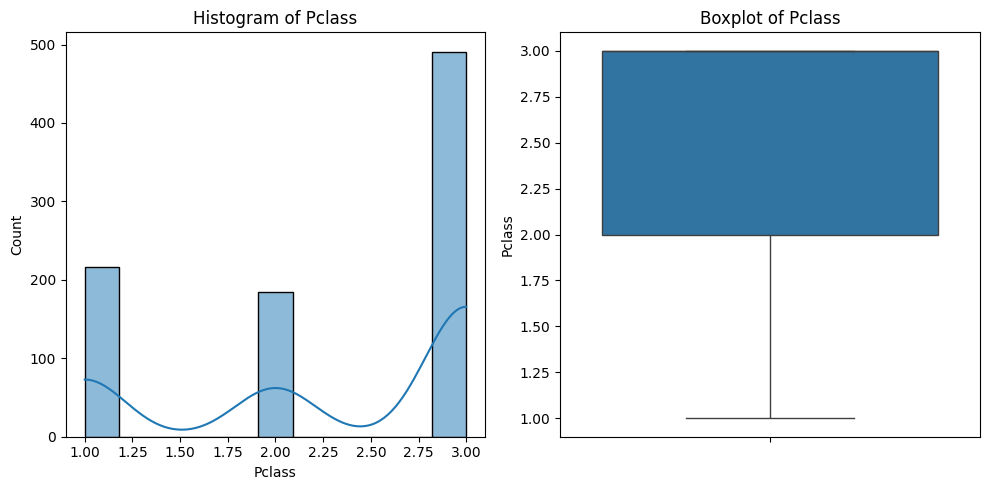

Generating plots for column: Age


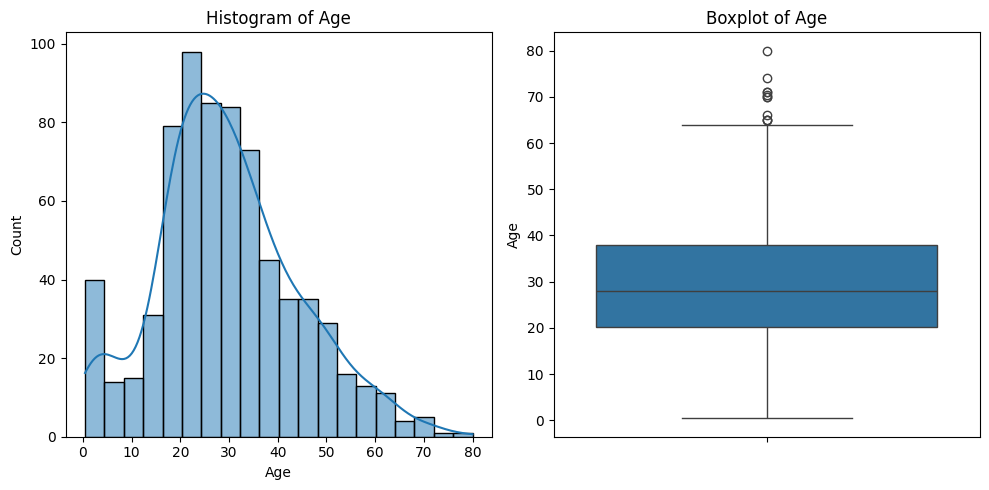

Generating plots for column: SibSp


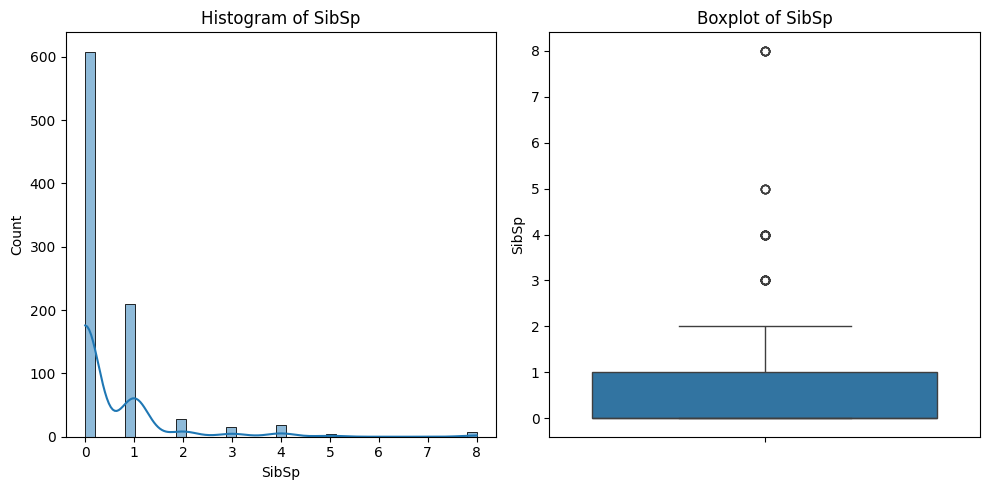

Generating plots for column: Parch


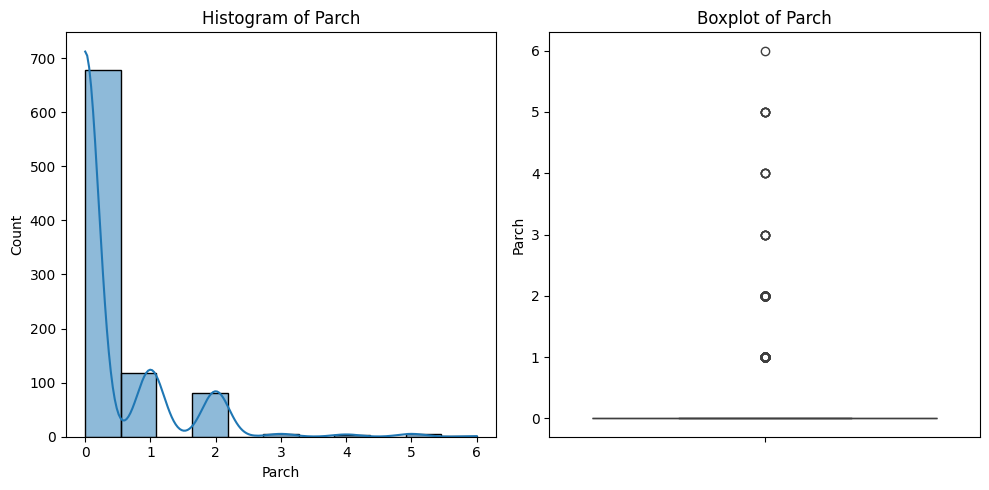

Generating plots for column: Fare


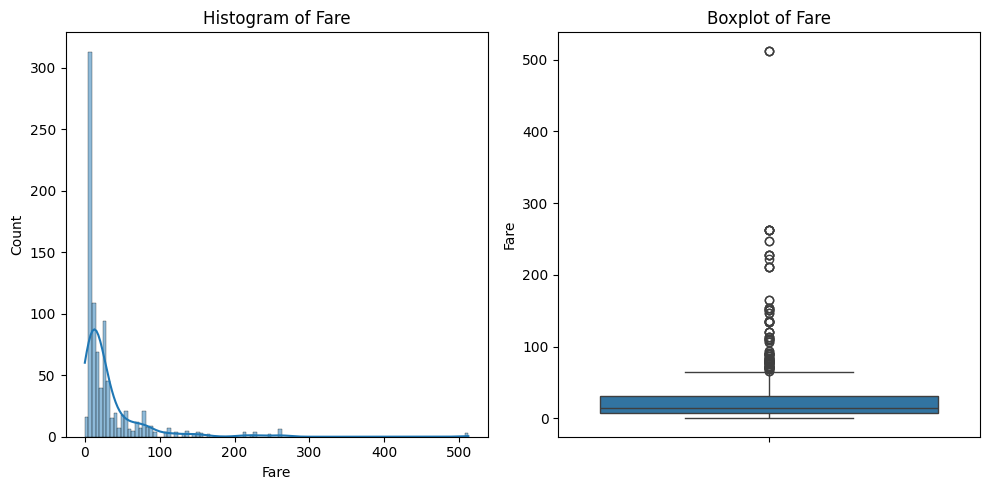

In [8]:
numeric_cols = titanic_df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    print(f"Generating plots for column: {col}")
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(titanic_df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=titanic_df[col].dropna())
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

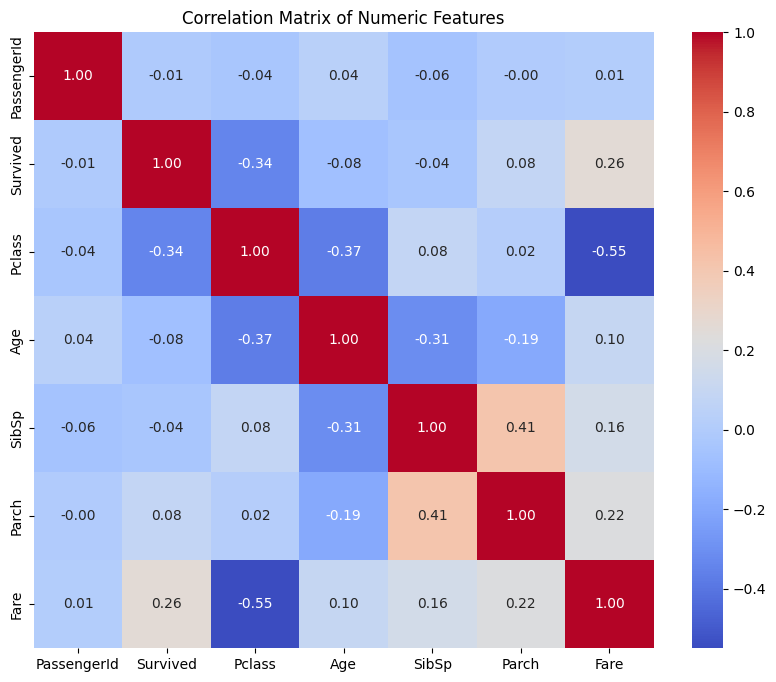

In [9]:
correlation_matrix = titanic_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

**Summary of Findings:**

*   **PassengerId:** This is likely just a unique identifier and does not provide meaningful insights into the survival rate.
*   **Survived:** This is our target variable, indicating whether a passenger survived (1) or not (0). The summary statistics show that about 38% of the passengers in this dataset survived.
*   **Pclass:** This represents the passenger class (1st, 2nd, or 3rd). The histogram shows that the majority of passengers were in 3rd class. The boxplot indicates that there is a relationship between Pclass and other numerical features, which is also reflected in the correlation matrix (e.g., negative correlation with Fare).
*   **Age:** The age distribution is somewhat skewed to the right, with a significant number of younger passengers. There are also some outliers in the older age range. The correlation matrix shows a slight negative correlation with Pclass and a slight negative correlation with SibSp.
*   **SibSp:** This represents the number of siblings or spouses aboard. The majority of passengers traveled alone or with one sibling/spouse. The boxplot shows several outliers with a high number of siblings/spouses. There is a positive correlation with Parch.
*   **Parch:** This represents the number of parents or children aboard. Similar to SibSp, most passengers traveled without parents or children. There are outliers with a higher number of parents/children. There is a positive correlation with SibSp.
*   **Fare:** The fare distribution is highly skewed to the right, with most passengers paying a lower fare and a few paying very high fares. The boxplot clearly shows many outliers. The correlation matrix shows a positive correlation with Survived and a negative correlation with Pclass, which makes sense as higher classes likely paid higher fares.

**Inferences:**

*   **Survival is likely influenced by Pclass and Fare:** Passengers in higher classes and those who paid higher fares appear to have a higher survival rate based on the correlation matrix and visualizations.
*   **Age distribution is not normal:** The skewed age distribution and presence of outliers might require some handling during feature engineering for machine learning models.
*   **Family size (SibSp and Parch) is related:** As expected, there is a positive correlation between the number of siblings/spouses and parents/children.
*   **PassengerId is not a useful feature for prediction:** As it's a unique identifier, it won't contribute to predicting survival.

These findings provide initial insights into the dataset and can help inform subsequent steps in the data analysis and modeling process.